In [1]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv(r'C:\Users\Bhaskar\glass.csv')

In [3]:
data.shape

(214, 10)

In [4]:
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [5]:
data.Type.value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

In [6]:
data.drop(['Type'],axis=1,inplace=True)

In [7]:
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


In [8]:
data['ID']=data.index+100

In [9]:
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,ID
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,100
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,101
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,102
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,103
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,104


In [10]:
list(enumerate(data.columns[:-1]))

[(0, 'RI'),
 (1, 'Na'),
 (2, 'Mg'),
 (3, 'Al'),
 (4, 'Si'),
 (5, 'K'),
 (6, 'Ca'),
 (7, 'Ba'),
 (8, 'Fe')]

In [11]:
f=data.columns[:-1]

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import keras

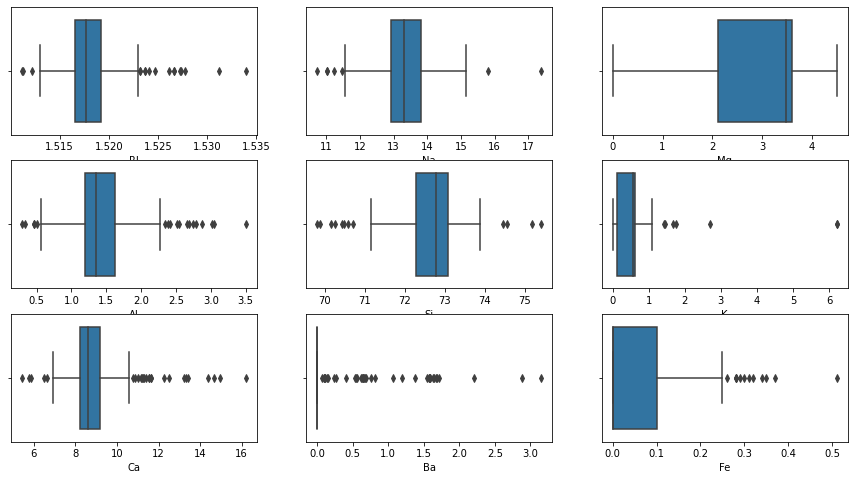

In [13]:
plt.figure(figsize=(15,8))
for col in enumerate(f):
    plt.subplot(3,3,col[0]+1)
    sns.boxplot(data=data,x=col[1])

In [14]:
for i in f:
    q1=data[i].quantile(0.01)
    q3=data[i].quantile(0.99)
    data[i][data[i]< q1]=q1
    data[i][data[i]> q3]=q3
    

<ipython-input-14-404c898c322d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][data[i]< q1]=q1
<ipython-input-14-404c898c322d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][data[i]> q3]=q3
<ipython-input-14-404c898c322d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][data[i]< q1]=q1
<ipython-input-14-404c898c322d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

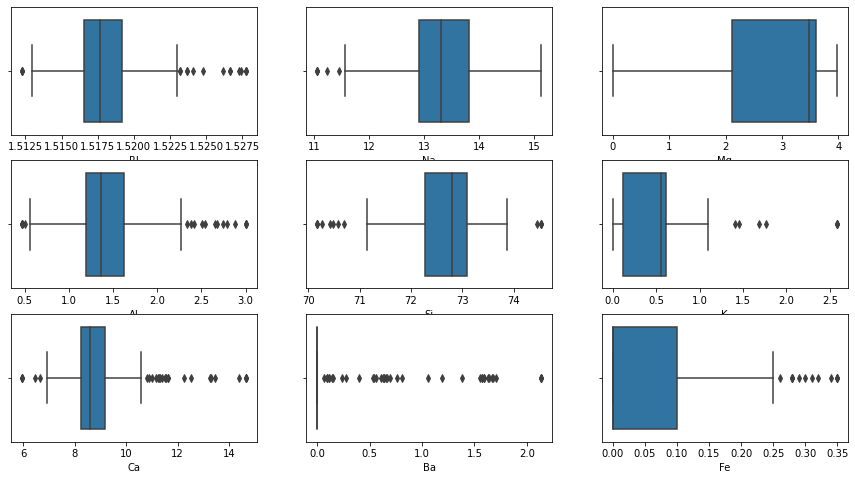

In [16]:
plt.figure(figsize=(15,8))
for col in enumerate(f):
    plt.subplot(3,3,col[0]+1)
    sns.boxplot(data=data,x=col[1])

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,ID
0,1.52101,13.64,3.9648,1.10,71.78,0.06,8.75,0.0,0.0,100
1,1.51761,13.89,3.6000,1.36,72.73,0.48,7.83,0.0,0.0,101
2,1.51618,13.53,3.5500,1.54,72.99,0.39,7.78,0.0,0.0,102
3,1.51766,13.21,3.6900,1.29,72.61,0.57,8.22,0.0,0.0,103
4,1.51742,13.27,3.6200,1.24,73.08,0.55,8.07,0.0,0.0,104


In [19]:
ss=StandardScaler()
df_02=ss.fit_transform(data.drop(['ID'],axis=1))

In [20]:
df_02=pd.DataFrame(df_02)

In [21]:
df_02.columns=data.columns[:-1]
df_02.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.950549,0.319899,0.893132,-0.707909,-1.170586,-1.021903,-0.147013,-0.367626,-0.597741
1,-0.255286,0.647661,0.639148,-0.172494,0.112257,0.044327,-0.817870,-0.367626,-0.597741
2,-0.762446,0.175684,0.604337,0.198179,0.463350,-0.184151,-0.854329,-0.367626,-0.597741
3,-0.237553,-0.243851,0.701809,-0.316644,-0.049787,0.272804,-0.533485,-0.367626,-0.597741
4,-0.322671,-0.165188,0.653073,-0.419608,0.584883,0.222032,-0.642864,-0.367626,-0.597741


In [25]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan

In [57]:
def hopk(x):
    d=x.shape[1]
    n=len(x)
    m=int(0.1*n)
    nbrs=NearestNeighbors(n_neighbors=1).fit(x.values)
    rand_sample=sample(range(0,n,1),m)
    ujd=[]
    wjd=[]
    for j in range(0,m):
        u_dist,_=nbrs.kneighbors(uniform(np.amin(x,axis=0),np.amax(x,axis=0),d).reshape(1,-1),2,return_distance=True)
        ujd.append(u_dist[0][1])
        w_dot,_=nbrs.kneighbors(x.iloc[rand_sample[j]].values.reshape(1,-1),2,return_distance=True)
        wjd.append(w_dot[0][1])
        
    H=sum(ujd)/(sum(ujd)+sum(wjd))
    if isnan(H):
        print(ujd,wjd)
        H=0
    return H
    


In [67]:
hopk(df_02)

0.8076977540850204

In [71]:
from sklearn.metrics import silhouette_score

In [38]:
still=[]
for k in range(2,11):
    kmean=KMeans(n_clusters=k,random_state=0).fit(df_02)
    still.append([k,silhouette_score(df_02,kmean.labels_)])
    print(kmean.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0
 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
[2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 2 2 0 0 0 2 0 0 0 2 2 0 2 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2
 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 2 0 0 0 0 2 1 0 2 2 2 0 2 2 0 0 2 0 2 2 2 2 0 1 1 1 2 1
 0 1 2 2 2 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1]
[2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 2 2 1 1 1 2 1 1 1 2 2 1 2 1 1 1 1 1 1 1 1 1 1 2 2 2 

In [72]:
still

[[2, 0.4058217949579743],
 [3, 0.3673729456231893],
 [4, 0.38965791357902463],
 [5, 0.363834928566878],
 [6, 0.3320112996972162],
 [7, 0.3470784394455468],
 [8, 0.3511437557089502],
 [9, 0.2911150296031993],
 [10, 0.3021486850557049]]

In [73]:
kmean.labels_

array([0, 7, 7, 7, 7, 6, 7, 7, 1, 7, 6, 7, 6, 6, 7, 7, 7, 0, 1, 7, 6, 0,
       7, 7, 7, 7, 7, 7, 7, 7, 6, 7, 6, 7, 7, 7, 1, 7, 0, 0, 7, 7, 7, 0,
       6, 1, 6, 0, 0, 1, 0, 1, 7, 7, 7, 6, 6, 7, 7, 7, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 6, 7, 7, 7, 7, 7, 7, 1, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 6, 7, 6, 7, 7, 1, 6, 6, 7, 7, 6, 7, 6, 0, 0, 3, 3, 3, 4, 4,
       3, 3, 3, 1, 7, 1, 1, 7, 6, 7, 7, 6, 7, 7, 1, 1, 7, 1, 1, 1, 4, 3,
       7, 1, 7, 6, 6, 7, 7, 7, 7, 6, 6, 7, 6, 6, 1, 7, 7, 7, 6, 0, 1, 7,
       7, 7, 7, 0, 1, 1, 1, 6, 6, 9, 4, 4, 4, 4, 4, 4, 4, 5, 5, 4, 6, 4,
       1, 1, 1, 1, 2, 2, 4, 4, 2, 9, 9, 1, 0, 0, 2, 2, 2, 8, 8, 2, 2, 2,
       2, 2, 2, 7, 2, 8, 2, 8, 8, 9, 2, 2, 8, 8, 8, 8])

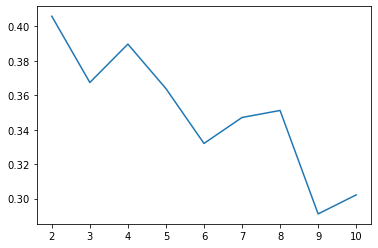

In [74]:
stil=pd.DataFrame(still)
plt.plot(stil[0],stil[1])
plt.show()

In [75]:
kmean.labels_

array([0, 7, 7, 7, 7, 6, 7, 7, 1, 7, 6, 7, 6, 6, 7, 7, 7, 0, 1, 7, 6, 0,
       7, 7, 7, 7, 7, 7, 7, 7, 6, 7, 6, 7, 7, 7, 1, 7, 0, 0, 7, 7, 7, 0,
       6, 1, 6, 0, 0, 1, 0, 1, 7, 7, 7, 6, 6, 7, 7, 7, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 6, 7, 7, 7, 7, 7, 7, 1, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 6, 7, 6, 7, 7, 1, 6, 6, 7, 7, 6, 7, 6, 0, 0, 3, 3, 3, 4, 4,
       3, 3, 3, 1, 7, 1, 1, 7, 6, 7, 7, 6, 7, 7, 1, 1, 7, 1, 1, 1, 4, 3,
       7, 1, 7, 6, 6, 7, 7, 7, 7, 6, 6, 7, 6, 6, 1, 7, 7, 7, 6, 0, 1, 7,
       7, 7, 7, 0, 1, 1, 1, 6, 6, 9, 4, 4, 4, 4, 4, 4, 4, 5, 5, 4, 6, 4,
       1, 1, 1, 1, 2, 2, 4, 4, 2, 9, 9, 1, 0, 0, 2, 2, 2, 8, 8, 2, 2, 2,
       2, 2, 2, 7, 2, 8, 2, 8, 8, 9, 2, 2, 8, 8, 8, 8])

# elbow

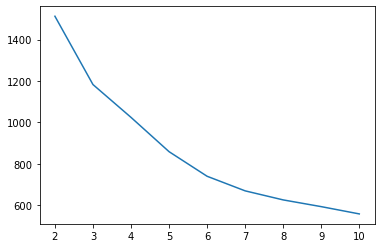

In [76]:
ssd=[]
for k in range(2,11):
    kmean=KMeans(n_clusters=k).fit(df_02)
    ssd.append([k,kmean.inertia_])
ssd=pd.DataFrame(ssd)
plt.plot(ssd[0],ssd[1])

In [77]:
kmean.inertia_

558.7964661627639

In [78]:
ssd

,0,1
0,2,1512.811716
1,3,1183.145221
2,4,1024.713740
3,5,859.209772
4,6,740.500088
5,7,670.098874
6,8,626.407907
7,9,593.932748
8,10,558.796466


In [79]:
KMeans()

KMeans()

In [80]:
kmean=KMeans(n_clusters=3,random_state=0)
kmean.fit(df_02)

KMeans(n_clusters=3, random_state=0)

In [81]:
kmean.labels_

array([2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 2,
       0, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 2, 1, 0, 2, 2, 2, 0, 2, 2, 0, 0, 2, 0, 2,
       2, 2, 2, 0, 1, 1, 1, 2, 1, 0, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [82]:
len(kmean.labels_)

214

In [83]:
data['Label']=kmean.labels_

In [84]:
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,ID,Label
0,1.52101,13.64,3.9648,1.10,71.78,0.06,8.75,0.0,0.0,100,2
1,1.51761,13.89,3.6000,1.36,72.73,0.48,7.83,0.0,0.0,101,0
2,1.51618,13.53,3.5500,1.54,72.99,0.39,7.78,0.0,0.0,102,0
3,1.51766,13.21,3.6900,1.29,72.61,0.57,8.22,0.0,0.0,103,0
4,1.51742,13.27,3.6200,1.24,73.08,0.55,8.07,0.0,0.0,104,0


In [85]:
data.Label.value_counts()

0    135
2     50
1     29
Name: Label, dtype: int64

In [86]:
data.groupby('Label')[['K','Ca','Ba','Fe']].mean()

,K,Ca,Ba,Fe
Label,,,,
0,0.617284,8.414356,0.016148,0.062721
1,0.171724,8.478138,0.989055,0.013448
2,0.213400,10.676816,0.095526,0.063174


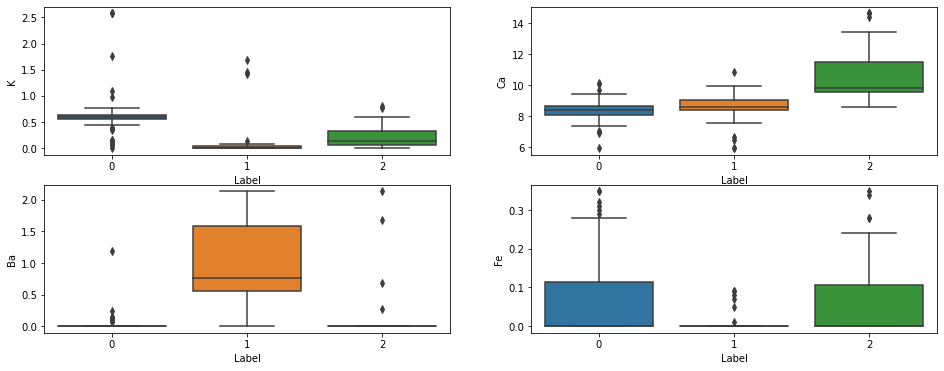

In [89]:
f=['K','Ca','Ba','Fe']
plt.figure(figsize=(16,6))
for i in enumerate(f):
    plt.subplot(2,2,i[0]+1)
    sns.boxplot(data=data,x='Label',y=i[1])

In [91]:
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,ID,Label
0,1.52101,13.64,3.9648,1.10,71.78,0.06,8.75,0.0,0.0,100,2
1,1.51761,13.89,3.6000,1.36,72.73,0.48,7.83,0.0,0.0,101,0
2,1.51618,13.53,3.5500,1.54,72.99,0.39,7.78,0.0,0.0,102,0
3,1.51766,13.21,3.6900,1.29,72.61,0.57,8.22,0.0,0.0,103,0
4,1.51742,13.27,3.6200,1.24,73.08,0.55,8.07,0.0,0.0,104,0


In [96]:
list(enumerate(data['Label']==2))

[(0, True),
 (1, False),
 (2, False),
 (3, False),
 (4, False),
 (5, False),
 (6, False),
 (7, False),
 (8, False),
 (9, False),
 (10, False),
 (11, False),
 (12, False),
 (13, False),
 (14, False),
 (15, False),
 (16, False),
 (17, True),
 (18, False),
 (19, False),
 (20, False),
 (21, True),
 (22, False),
 (23, False),
 (24, False),
 (25, False),
 (26, False),
 (27, False),
 (28, False),
 (29, False),
 (30, False),
 (31, False),
 (32, False),
 (33, False),
 (34, False),
 (35, False),
 (36, False),
 (37, False),
 (38, True),
 (39, True),
 (40, False),
 (41, False),
 (42, False),
 (43, True),
 (44, False),
 (45, False),
 (46, False),
 (47, True),
 (48, True),
 (49, False),
 (50, True),
 (51, False),
 (52, False),
 (53, False),
 (54, False),
 (55, False),
 (56, False),
 (57, False),
 (58, False),
 (59, False),
 (60, False),
 (61, True),
 (62, True),
 (63, True),
 (64, True),
 (65, True),
 (66, True),
 (67, True),
 (68, True),
 (69, True),
 (70, False),
 (71, False),
 (72, False),
 (73, 